In [16]:
from random import shuffle

import cv2 as cv
import numpy as np
import seaborn as sns
from ipywidgets import FloatSlider, IntSlider, interact
from matplotlib import pyplot as plt

from detecters import edges2sectors
from filters import DoG, blur
from utils import float2int, imshow, int2float, intensity_image, panels

In [17]:
image = plt.imread('images/a.png')[..., :3]
scalar = intensity_image(image)
scalar.shape

(264, 335)

# 1. Выделение краев

In [18]:
@interact(min_=IntSlider(min=0, max=255, value=100), max_=IntSlider(min=0, max=255, value=200))
def _(min_, max_):
    edges = cv.Canny(float2int(scalar), min_, max_)
    sectors = edges2sectors(edges)
    n_sectors = np.max(sectors)
    colors = list(range(1, n_sectors+1))
    shuffle(colors)
    colors = [0,] + colors
    recolored = np.take(colors, sectors)
    imshow(recolored.astype(float)/n_sectors, cmap='hsv')
    plt.title(n_sectors)

interactive(children=(IntSlider(value=100, description='min_', max=255), IntSlider(value=200, description='max…

# 2. Пороговый метод

<Axes: ylabel='Count'>

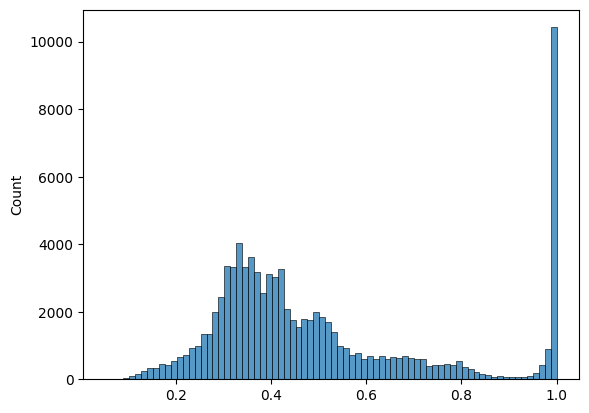

In [19]:
sns.histplot(scalar.ravel())

In [ ]:
@interact(P=IntSlider(min=0, max=100, value=50))
def _(P):
    T = np.percentile(scalar, P)
    imshow(np.where(scalar > T, 1., 0.))
    plt.title(f"{T = :.2f}")

interactive(children=(IntSlider(value=50, description='P'), Output()), _dom_classes=('widget-interact',))

In [25]:
np.unique(scalar).shape


(955,)

In [ ]:
@interact(P=IntSlider(min=0, max=100, value=50))
def _(P):
    T = np.percentile(scalar, P)
    imshow(np.where(scalar > T, 1., 0.))
    plt.title(f"{T = :.2f}")